# Script for searching StudyIDs given a Finding Label

In [1]:
import pandas as pd

# Cargar los tres archivos CSV
base_path = "/mnt/nas_anakena/datasets/uc-cxr/processed_data/reports_and_labels_llm"
df_findings = pd.read_csv(f"{base_path}/100k_llm_findings_labels.csv")
df_sentences = pd.read_csv(f"{base_path}/labels_per_sentence_5k.csv")


def search_finding_label(label_name):
    print(f"\n===== Search for finding label: '{label_name}' =====\n")
    
    # --- Search in 100k file ---
    if label_name in df_findings.columns:
        studies_with_label = df_findings[
            df_findings[label_name].isin(["Certainly True", "Maybe True"])
        ]["studyID"].unique()
    else:
        studies_with_label = df_findings[
            df_findings["llm_labels"].str.contains(label_name, na=False)
        ]["studyID"].unique()
    
    total = len(studies_with_label)
    print(f"📊 Total studies (100k file) containing '{label_name}': {total}\n")
    
    print("🔟 First 10 studyIDs from 100k file:")
    for sid in studies_with_label[:10]:
        print(f" - {sid}")
    
    # --- Search in 5k file ---
    studies_with_label_5k = df_sentences[
        df_sentences["findings_affirmed"].str.contains(label_name, na=False)
    ]["studyID"].unique()
    
    print("\n🖐️ 5 studyIDs from the 5k file:")
    for sid in studies_with_label_5k[:5]:
        print(f" - {sid}")
    
    return studies_with_label, studies_with_label_5k


# ==== Example usage ====
search_finding_label("Cardiomegaly")

/tmp/ipykernel_3723339/3131727050.py:5: DtypeWarning: Columns (10,17,24,32,44,46,47,60,63,85,93,115,116,122,135,136,140,147,164,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df_findings = pd.read_csv(f"{base_path}/100k_llm_findings_labels.csv")



===== Search for finding label: 'Cardiomegaly' =====

📊 Total studies (100k file) containing 'Cardiomegaly': 20119

🔟 First 10 studyIDs from 100k file:
 - 1.3.51.0.1.1.146.155.249.152.4679100.4679091
 - 1.3.51.0.1.1.146.155.249.152.4679144.4679135
 - 1.3.51.0.1.1.146.155.249.152.4683482.4683473
 - 1.3.51.0.1.1.146.155.249.152.4683806.4683797
 - 1.3.51.0.1.1.146.155.249.152.4683845.4683836
 - 1.3.51.0.1.1.146.155.249.152.4689363.4689354
 - 1.3.51.0.1.1.146.155.249.152.4690377.4690368
 - 1.3.51.0.1.1.146.155.249.152.4695013.4695004
 - 1.3.51.0.1.1.146.155.249.152.4697176.4697167
 - 1.3.51.0.1.1.146.155.249.152.4701137.4701128

🖐️ 5 studyIDs from the 5k file:
 - 1.3.51.0.1.1.146.155.249.152.4685561.4685552
 - 1.3.51.0.1.1.146.155.249.152.4670873.4670864
 - 1.3.51.0.1.1.146.155.249.152.8105806.8105890
 - 1.3.51.0.1.1.146.155.249.152.6424054.6424046
 - 1.3.51.0.1.1.146.155.249.152.4669407.4669398


(array(['1.3.51.0.1.1.146.155.249.152.4679100.4679091',
        '1.3.51.0.1.1.146.155.249.152.4679144.4679135',
        '1.3.51.0.1.1.146.155.249.152.4683482.4683473', ...,
        '1.3.51.0.1.1.146.155.249.152.8303188.8303272',
        '1.3.51.0.1.1.146.155.249.152.8303540.8303624',
        '1.3.51.0.1.1.146.155.249.152.8304173.8304257'], dtype=object),
 array(['1.3.51.0.1.1.146.155.249.152.4685561.4685552',
        '1.3.51.0.1.1.146.155.249.152.4670873.4670864',
        '1.3.51.0.1.1.146.155.249.152.8105806.8105890',
        '1.3.51.0.1.1.146.155.249.152.6424054.6424046',
        '1.3.51.0.1.1.146.155.249.152.4669407.4669398',
        '1.3.51.0.1.1.146.155.249.152.8083081.8083165',
        '1.3.51.0.1.1.146.155.249.152.8078136.8078220',
        '1.3.51.0.1.1.146.155.249.152.4691977.4691968',
        '1.3.51.0.1.1.146.155.249.152.8135788.8135872',
        '1.3.51.0.1.1.146.155.249.152.6441119.6441111',
        '1.3.51.0.1.1.146.155.249.152.5435701.5435692',
        '1.3.51.0.1.1.146.1

# Show text-data given an StudyID

In [4]:
import pandas as pd

# Cargar los tres archivos CSV
base_path = "/mnt/nas_anakena/datasets/uc-cxr/processed_data/reports_and_labels_llm"
df_findings = pd.read_csv(f"{base_path}/100k_llm_findings_labels.csv")
df_sections = pd.read_csv(f"{base_path}/sections_of_report.csv")
df_sentences = pd.read_csv(f"{base_path}/labels_per_sentence_5k.csv")

def show_study_info(study_id):
    print(f"\n===== Información para studyID: {study_id} =====\n")

    # --- Archivo 1: 100k_llm_finding_labels.csv ---
    study_finding = df_findings[df_findings["studyID"] == study_id]
    if not study_finding.empty:
        row = study_finding.iloc[0]  # solo un estudio por ID
        print("📌 Archivo: 100k_llm_findings_labels.csv")
        print(f" - study_date: {row.get('study_date', 'N/A')}")
        print(f" - age: {row.get('age', 'N/A')}")
        print(f" - report_text:\n{row.get('report_text', 'N/A')}\n")
        print(f" - regex_labels: {row.get('regex_labels', 'N/A')}")
        print(f" - llm_labels: {row.get('llm_labels', 'N/A')}")

        # columnas de clasificación por label (8:-1)
        cols = df_findings.columns[8:-1]
        label_status = row[cols]
        print("\n - Estado de labels (ciertas/maybe/false...):")
        print(label_status[label_status.notna()].to_dict())
        print("\n")
    else:
        print("❌ No se encontró en 100k_llm_findings_labels.csv\n")

    # --- Archivo 2: sections_of_report.csv ---
    study_sections = df_sections[df_sections["studyID"] == study_id]
    if not study_sections.empty:
        row = study_sections.iloc[0]
        print("📌 Archivo: sections_of_report.csv")
        print(f" - projections: {row.get('projections', 'N/A')}")
        print(f" - history: {row.get('history', 'N/A')}")
        print(f" - finding_sentences_es: {row.get('finding_sentences_es', 'N/A')}")
        print(f" - finding_sentences_en: {row.get('finding_sentences_en', 'N/A')}\n")
    else:
        print("❌ No se encontró en sections_of_report.csv\n")

    # --- Archivo 3: labels_per_sentence_5k.csv ---
    study_sentences = df_sentences[df_sentences["studyID"] == study_id]
    if not study_sentences.empty:
        print("📌 Archivo: labels_per_sentence_5k.csv")
        for _, row in study_sentences.iterrows():
            print(f" - sentence_index: {row['sentence_index']}")
            print(f"   sentence_text: {row['sentence_text']}")
            print(f"   positive_or_not: {row['positive_or_not']}")
            print(f"   findings_affirmed: {row['findings_affirmed']}\n")
    else:
        print("❌ No se encontró en labels_per_sentence_5k.csv\n")


# ==== Ejemplo de uso ====
show_study_info("1.3.51.0.1.1.146.155.249.152.4685561.4685552")

/tmp/ipykernel_3723339/155021107.py:5: DtypeWarning: Columns (10,17,24,32,44,46,47,60,63,85,93,115,116,122,135,136,140,147,164,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df_findings = pd.read_csv(f"{base_path}/100k_llm_findings_labels.csv")



===== Información para studyID: 1.3.51.0.1.1.146.155.249.152.4685561.4685552 =====

📌 Archivo: 100k_llm_findings_labels.csv
 - study_date: 17/01/2018
 - age: 59
 - report_text:
RADIOGRAFÍA DE TÓRAX POSTEROANTERIOR Y LATERAL 
Hallazgos: 
Se dispone para comparar con radiografía de tórax del 06/06/17. 
No hay signos derrame pleural ni de neumotórax. 
Se observa pérdida definición hiliar bilateral, lo que puede traducir cierto grado de edema 
intersticial. 
No se observan focos de condensación en el parénquima pulmonar. 
Bandas atelectásicas subsegmentarias bibasales. 
Moderado aumento de tamaño de la silueta cardíaca.   
Aorta torácica elongada. 
Cambios postquirúrgicos de recambio valvular en situación mitral, con suturas esternales metálicas 
integras en línea media. 


 - regex_labels: ['Abnormal foreign body', 'Aortic atheromatosis', 'Aortic button enlargement', 'Aortic ectasia', 'Aortic elongation', 'Artificial heart valve', 'Artificial mitral heart valve', 'Ascendent aortic elonga

# Scripts for showing Dicom/Image given an StudyID

In [3]:
import pandas as pd

# Load the metadata parquet
df = pd.read_parquet("/mnt/nas_anakena/datasets/uc-cxr/processed_data/metadata/anon.parquet")

# Check the first few rows
print(df.head())

# Check all column names
print("Columns in the dataset:")
print(df.columns.tolist())


   file_id AccessionNumber AcquisitionDate AcquisitionDateTime  \
0     6981           79978        20220928                None   
1     6983           99438        20240816                None   
2     7074           73867        20230219                None   
3     7341           93208        20300812                None   
4     7482           25129        20250511                None   

  AcquisitionDeviceProcessingCode AcquisitionNumber AcquisitionTime  \
0                            None                 1      113237.539   
1                            None              None      150949.696   
2                            None              None          101006   
3                            None                 1      124132.521   
4                            None              None          010801   

  BitsAllocated BitsStored BodyPartExamined  ...  \
0            16         12            CHEST  ...   
1          None       None             None  ...   
2            16     

NumPy version: 1.26.4
First 10 unique StudyInstanceUIDs:
1.3.51.0.1.1.146.155.249.152.971261.452459
1.3.51.0.1.1.146.155.249.152.971261.572904
1.3.51.0.1.1.146.155.249.152.971261.415532
1.3.51.0.1.1.146.155.249.152.971261.535695
1.3.51.0.1.1.146.155.249.152.971261.154351
1.3.51.0.1.1.146.155.249.152.971261.54271
1.3.51.0.1.1.146.155.249.152.971261.195444
1.3.51.0.1.1.146.155.249.152.971261.58569
1.3.51.0.1.1.146.155.249.152.971261.469995
1.3.51.0.1.1.146.155.249.152.971261.306786

Loading DICOM from StudyInstanceUID: 1.3.51.0.1.1.146.155.249.152.971261.452459
File path: /mnt/nas_anakena/datasets/uc-cxr/processed_data/v2/anonymized_dicom/anonymized_dicom/public/971261-040254/1.3.51.0.1.1.146.155.249.152.971261.452459/1.3.51.0.1.1.146.155.249.152.971261.455684/1.3.51.0.1.1.146.155.249.152.971261.455685.dcm


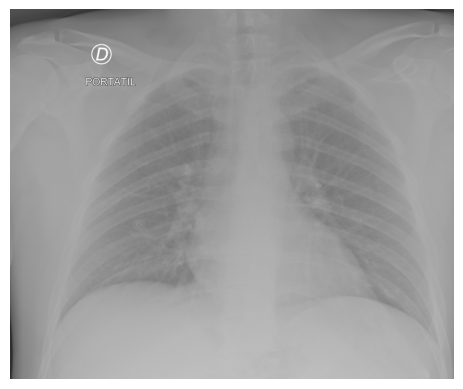

Patient ID: 971261-040254
Study Date: 20220928
Modality: DX


In [11]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import pydicom

print("NumPy version:", numpy.__version__)

# Load metadata parquet
df = pd.read_parquet("/mnt/nas_anakena/datasets/uc-cxr/processed_data/metadata/anon.parquet")

# Show at least 10 unique StudyInstanceUIDs
unique_studies = df['StudyInstanceUID'].unique()
print("First 10 unique StudyInstanceUIDs:")
for study_uid in unique_studies[:10]:
    print(study_uid)

# Pick the first study (or you can change to another)
selected_study_uid = unique_studies[0]

# Filter DICOMs for that study
study_df = df[df['StudyInstanceUID'] == selected_study_uid]

# Pick the first DICOM file in that study
dicom_path = study_df.iloc[0]['file_path']
print("\nLoading DICOM from StudyInstanceUID:", selected_study_uid)
print("File path:", dicom_path)

# Read the DICOM
ds = pydicom.dcmread(dicom_path)

# Access pixel data
img = ds.pixel_array

# Display the image
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

# Print some metadata
print("Patient ID:", ds.get("PatientID", "N/A"))
print("Study Date:", ds.get("StudyDate", "N/A"))
print("Modality:", ds.get("Modality", "N/A"))


In [5]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import pydicom

print("NumPy version:", numpy.__version__)

# Load metadata parquet
df = pd.read_parquet("/mnt/nas_anakena/datasets/uc-cxr/processed_data/metadata/anon.parquet")

# Cargar los tres archivos CSV
base_path = "/mnt/nas_anakena/datasets/uc-cxr/processed_data/reports_and_labels_llm"
df_findings = pd.read_csv(f"{base_path}/100k_llm_findings_labels.csv")
df_sections = pd.read_csv(f"{base_path}/sections_of_report.csv")
df_sentences = pd.read_csv(f"{base_path}/labels_per_sentence_5k.csv")

def show_study_info(study_id):
    print(f"\n===== Información para studyID: {study_id} =====\n")

    # --- Display DICOM images for the study ---
    print("\nDisplaying all images for StudyInstanceUID:", study_id)
    study_df = df[df['StudyInstanceUID'] == study_id]
    study_dicom_paths = study_df['file_path'].tolist()

    if study_dicom_paths:
        num_images = len(study_dicom_paths)
        fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))
        
        # Handle the case of a single image
        if num_images == 1:
            axes = [axes]

        for i, path in enumerate(study_dicom_paths):
            try:
                ds_all = pydicom.dcmread(path)
                img_all = ds_all.pixel_array
                axes[i].imshow(img_all, cmap="gray")
                axes[i].set_title(f"Image {i+1}")
                axes[i].axis("off")
            except Exception as e:
                print(f"Error loading DICOM file {path}: {e}")
                axes[i].set_title(f"Error loading Image {i+1}")
                axes[i].axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print("No images found for this StudyInstanceUID.")
    
    print("-" * 50) # Separator

    # --- Archivo 1: 100k_llm_finding_labels.csv ---
    study_finding = df_findings[df_findings["studyID"] == study_id]
    if not study_finding.empty:
        row = study_finding.iloc[0]
        print("📌 Archivo: 100k_llm_findings_labels.csv")
        print(f" - study_date: {row.get('study_date', 'N/A')}")
        print(f" - age: {row.get('age', 'N/A')}")
        print(f" - report_text:\n{row.get('report_text', 'N/A')}\n")
        print(f" - regex_labels: {row.get('regex_labels', 'N/A')}")
        print(f" - llm_labels: {row.get('llm_labels', 'N/A')}")
        
        cols = df_findings.columns[8:-1]
        label_status = row[cols]
        print("\n - Estado de labels (ciertas/maybe/false...):")
        print(label_status[label_status.notna()].to_dict())
        print("\n")
    else:
        print("❌ No se encontró en 100k_llm_findings_labels.csv\n")
    
    print("-" * 50) # Separator

    # --- Archivo 2: sections_of_report.csv ---
    study_sections = df_sections[df_sections["studyID"] == study_id]
    if not study_sections.empty:
        row = study_sections.iloc[0]
        print("📌 Archivo: sections_of_report.csv")
        print(f" - projections: {row.get('projections', 'N/A')}")
        print(f" - history: {row.get('history', 'N/A')}")
        print(f" - finding_sentences_es: {row.get('finding_sentences_es', 'N/A')}")
        print(f" - finding_sentences_en: {row.get('finding_sentences_en', 'N/A')}\n")
    else:
        print("❌ No se encontró en sections_of_report.csv\n")
    
    print("-" * 50) # Separator

    # --- Archivo 3: labels_per_sentence_5k.csv ---
    study_sentences = df_sentences[df_sentences["studyID"] == study_id]
    if not study_sentences.empty:
        print("📌 Archivo: labels_per_sentence_5k.csv")
        for _, row in study_sentences.iterrows():
            print(f" - sentence_index: {row['sentence_index']}")
            print(f"   sentence_text: {row['sentence_text']}")
            print(f"   positive_or_not: {row['positive_or_not']}")
            print(f"   findings_affirmed: {row['findings_affirmed']}\n")
    else:
        print("❌ No se encontró en labels_per_sentence_5k.csv\n")

# ==== Ejemplo de uso ====
show_study_info("1.3.51.0.1.1.146.155.249.152.4683806.4683797")

NumPy version: 1.26.4


/tmp/ipykernel_3723339/884079400.py:13: DtypeWarning: Columns (10,17,24,32,44,46,47,60,63,85,93,115,116,122,135,136,140,147,164,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df_findings = pd.read_csv(f"{base_path}/100k_llm_findings_labels.csv")



===== Información para studyID: 1.3.51.0.1.1.146.155.249.152.4683806.4683797 =====


Displaying all images for StudyInstanceUID: 1.3.51.0.1.1.146.155.249.152.4683806.4683797
No images found for this StudyInstanceUID.
--------------------------------------------------
📌 Archivo: 100k_llm_findings_labels.csv
 - study_date: 14/01/2018
 - age: 44
 - report_text:
RADIOGRAFÍA DE TÓRAX PA - LATERAL 
Antecedentes clínicos: Dolor precordial. 
Hallazgos: 
Diafragma en buena posición. 
No hay signos de derrame pleural ni neumotórax. 
No se observan focos de condensación ni masas en el parénquima pulmonar, así como tampoco 
signos de edema intersticial. 
Bandas atelectásicas subsegmentarias basales izquierdas. 
Leve aumento de tamaño de la silueta cardíaca.  
Aorta torácica, hilios y dibujo vascular pulmonar sin alteraciones. 
Clips quirúrgicos sobreproyectados al epigastrio. 


 - regex_labels: ['Abnormal bronchovascular markings', 'Abnormal foreign body', 'Atelectasis', 'Basal atelectasis', 'Ca